# Compare SoHappy output files
This scripts analyse the fits file produced with SoHappy


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
import sys
sys.path.append('../../utilities_ths') # path is where this module is
from utilities_ths import MyLabel


In [2]:
def ConvertAsciiToFits(txtfile_noext):
    data = Table.read(txtfile_noext+".txt",format="ascii")
    data.write(txtfile_noext+'_converted.fits', format="fits",overwrite="True")
    print(" <<<<<<<< Converted >>>>>>>>")

In [3]:
def GetData(file,debug=False):
    data = Table.read(file,format="fits")
    if (debug): print(data)
    return data

### Compare Thierry and Franceso data

In [4]:
data20L = GetData("ResultFrancescoLongo/GRBz20.fits")
data40L = GetData("ResultFrancescoLongo/GRBz40.fits")
data20  = GetData("ResultArchiveOfficiel/Result-PseudoPopulation-20deg/PopulationSummary_Reco1_100s_100iter.fits")
data40  = GetData("ResultArchiveOfficiel/Result-PseudoPopulation-40deg/PopulationSummary_Reco1_100s_100iter.fits")
# data60 = GetData("Result-PseudoPopulation-60deg/PopulationSummary_Reco1_100s_100iter.fits")
data = vstack([data20, data40, data20L, data40L])
print(len(data20),len(data40),len(data20L),len(data40L))
del data20
del data40
del data20L
del data40L


80 80 80 80


In [5]:
# Initialize data
name    = data["GRB"]
z       = data["z"]
theta   = data["Zenith"]
sigmax  = data["sigmax"]
nex_max = data["nex_max"]
nb_max  = data["nb_max"]
#t3s     = data["t3s"][data["t3s"]>0] # This changes the dimension of t3s !
t3s     = data["t3s"]
idt3s   = np.where(t3s>0) # If defined
det3s   = data["det3s"]
t5s     = data["t5s"]
idt5s   = np.where(t5s>0) 
det5s   = data["det5s"]  
#print(np.mean(t3s))

In [6]:
len(np.where(t3s>0)[0])

318

In [47]:
# Compare maximum siginificance reached
def CompareVariable(x,xlabel=" ",log=True, logy=True, domain=None):
    nbin = 25
    if (log):
        fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
        ax00 = ax[0,0]
        ax01 = ax[0,1]
        ax10 = ax[1,0]
        ax11 = ax[1,1]
    else:
        fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
        ax00 = ax[0]
        ax01 = ax[1]
        
    n, bins, _ = ax00.hist(x[theta==20],bins=nbin,range=domain, alpha=0.5,label=MyLabel(sigmax[theta==20],"20° TS"))
    ax00.hist(x[theta==-20],bins, alpha=0.5 ,label=MyLabel(sigmax[theta==-20],"20° FL"))
    ax00.legend()
    if (logy): ax00.set_yscale('log')
    ax00.set_xlabel(xlabel)
    ax00.set_ylabel('Counts')

    n, bins, _ = ax01.hist(x[theta==40],bins=nbin,range=domain,alpha=0.5,label=MyLabel(sigmax[theta==40],"40° TS"))
    ax01.hist(x[theta==-40],bins, alpha=0.5 ,label=MyLabel(sigmax[theta==-40],"40° FL"))
    ax01.legend()
    if (logy): ax01.set_yscale('log')
    ax01.set_xlabel(xlabel)
    ax01.set_ylabel('Counts')

    if (log):
        n, bins, _ = ax10.hist(np.log10(x[theta==20]),bins=nbin,range=domain,alpha=0.5,label=MyLabel(sigmax[theta==20],"20° TS"))
        ax10.hist(np.log10(x[theta==-20]),bins, alpha=0.5,label=MyLabel(sigmax[theta==-20],"20° FL"))
        ax10.legend()
        ax10.set_xlabel('Log of '+xlabel)
        ax10.set_ylabel('Counts')

        n, bins, _ = ax11.hist(np.log10(x[theta==40]),bins=nbin,range=domain,alpha=0.5,label=MyLabel(sigmax[theta==40],"40° TS"))
        ax11.hist(np.log10(x[theta==-40]),bins, alpha=0.5,label=MyLabel(sigmax[theta==-40],"40° FL"))
        ax11.legend()
        ax11.set_xlabel('Log of '+ xlabel)
        ax11.set_ylabel('Counts')
        
    plt.show()
    return


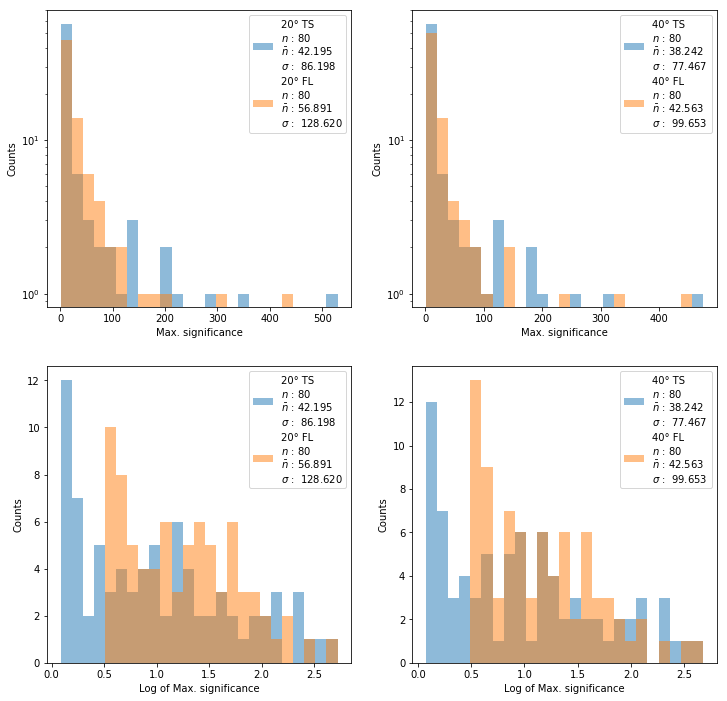

In [48]:
CompareVariable(sigmax,xlabel="Max. significance")

In [49]:

print("Number of GRB detected before the end of the simulation window")

print(" 20 degrees")
x= t3s[theta==20]
xnz = x[np.where(t3s[theta==20]>0)]
print(" TS : ",100*len(xnz)/len(x),' % (',len(xnz),'/',len(x),')')

x= t3s[theta==-20]
xnz = x[np.where(t3s[theta==-20]>0)]
print(" FL : ",100*len(xnz)/len(x),' % (',len(xnz),'/',len(x),')')

print(" 40 degrees")
x= t3s[theta==40]
xnz = x[np.where(t3s[theta==40]>0)]
print(" TS : ",100*len(xnz)/len(x),' % (',len(xnz),'/',len(x),')')

x= t3s[theta==-40]
xnz = x[np.where(t3s[theta==-40]>0)]
print(" FL : ",100*len(xnz)/len(x),' % (',len(xnz),'/',len(x),')')


Number of GRB detected before the end of the simulation window
 20 degrees
 TS :  98.75  % ( 79 / 80 )
 FL :  100.0  % ( 80 / 80 )
 40 degrees
 TS :  98.75  % ( 79 / 80 )
 FL :  100.0  % ( 80 / 80 )


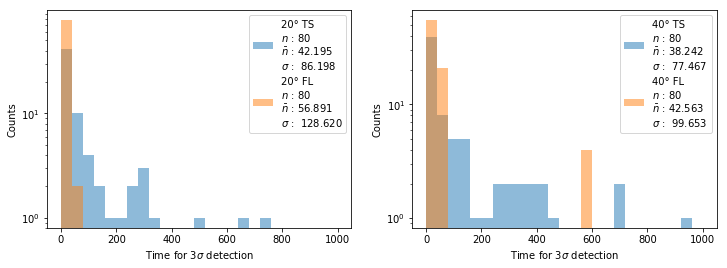

In [51]:
CompareVariable(t3s,xlabel="Time for 3$\sigma$ detection",log=False,logy=True,domain=[0,1000])

In [52]:

print("Number of GRB detected before the end of the simulation window")

print(" 20 degrees")
x= t5s[theta==20]
xnz = x[np.where(t5s[theta==20]>0)]
print(" TS : ",100*len(xnz)/len(x),' % (',len(xnz),'/',len(x),')')

x= t5s[theta==-20]
xnz = x[np.where(t5s[theta==-20]>0)]
print(" FL : ",100*len(xnz)/len(x),' % (',len(xnz),'/',len(x),')')

print(" 40 degrees")
x= t5s[theta==40]
xnz = x[np.where(t5s[theta==40]>0)]
print(" TS : ",100*len(xnz)/len(x),' % (',len(xnz),'/',len(x),')')

x= t5s[theta==-40]
xnz = x[np.where(t5s[theta==-40]>0)]
print(" FL : ",100*len(xnz)/len(x),' % (',len(xnz),'/',len(x),')')

Number of GRB detected before the end of the simulation window
 20 degrees
 TS :  71.25  % ( 57 / 80 )
 FL :  80.0  % ( 64 / 80 )
 40 degrees
 TS :  71.25  % ( 57 / 80 )
 FL :  72.5  % ( 58 / 80 )


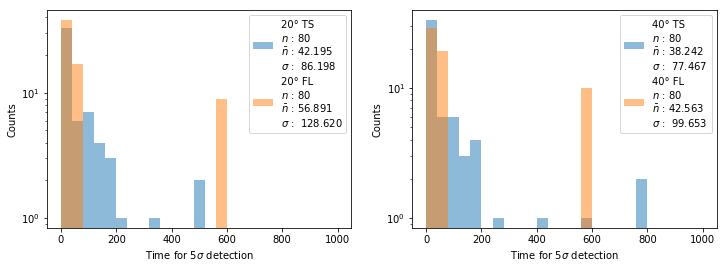

In [53]:
CompareVariable(t5s,xlabel="Time for 5$\sigma$ detection",log=False,logy=True,domain=[0,1000])

In [54]:
print("Number of GRB at more than 90% CL")
print(" 20 degrees")
x= det3s[theta==20]
print(" TS : ",100*len(x[x>0.9])/len(x),' %')
x= det3s[theta==-20]
print(" FL : ",100*len(x[x>0.9])/len(x),' %')

print(" 40 degrees")
x= det3s[theta==40]
print(" TS : ",100*len(x[x>0.9])/len(x),' %')
x= det3s[theta==-40]
print(" FL : ",100*len(x[x>0.9])/len(x),' %')

Number of GRB at more than 90% CL
 20 degrees
 TS :  63.75  %
 FL :  71.25  %
 40 degrees
 TS :  63.75  %
 FL :  62.5  %


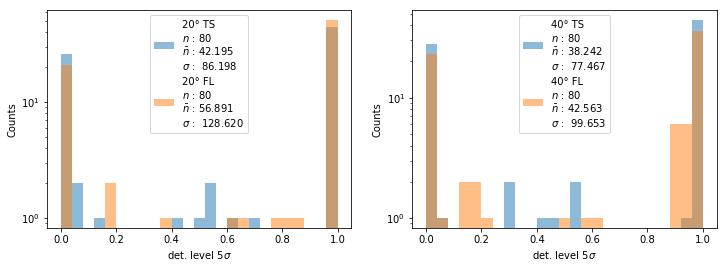

Number of GRB at more than 90% CL
 20 degrees
 TS :  56.25  %
 FL :  63.75  %
 40 degrees
 TS :  56.25  %
 FL :  56.25  %


In [55]:
CompareVariable(det5s,xlabel="det. level 5$\sigma$",log=False)
print("Number of GRB at more than 90% CL")
print(" 20 degrees")
x= det5s[theta==20]
print(" TS : ",100*len(x[x>0.9])/len(x),' %')
x= det5s[theta==-20]
print(" FL : ",100*len(x[x>0.9])/len(x),' %')

print(" 40 degrees")
x= det5s[theta==40]
print(" TS : ",100*len(x[x>0.9])/len(x),' %')
x= det5s[theta==-40]
print(" FL : ",100*len(x[x>0.9])/len(x),' %')